In [5]:
import pandas as pd
import yfinance
from preprocess import *
import pickle
import boto3
import io

In [77]:
def load_model_from_s3(bucket_name, model_key):
    s3 = boto3.client('s3')
    model_file = io.BytesIO()
    s3.download_fileobj(bucket_name, model_key, model_file)
    model_file.seek(0)
    model = pickle.load(model_file)
    return model

# Example usage
bucket_name = 'stockpredwebbucket'
model_keys = ['tsla_lstm.pkl', 'msft_lstm.pkl', 'nvda_lstm.pkl']  # List of your model file names
models = [load_model_from_s3(bucket_name, 'sagemaker/lstm_models/'+key) for key in model_keys]

In [63]:
aapl = preprocess('aapl')

                                 Open        High         Low       Close  \
Date                                                                        
2020-10-05 00:00:00-04:00  111.317961  113.995610  110.966153  113.849022   
2020-10-06 00:00:00-04:00  113.067233  113.477681  109.695741  110.585037   
2020-10-07 00:00:00-04:00  112.011803  112.920640  111.532947  112.461334   
2020-10-08 00:00:00-04:00  113.604693  113.751281  111.982463  112.353821   
2020-10-09 00:00:00-04:00  112.656788  114.337651  112.304979  114.308334   
...                               ...         ...         ...         ...   
2024-08-29 00:00:00-04:00  230.100006  232.919998  228.880005  229.789993   
2024-08-30 00:00:00-04:00  230.190002  230.399994  227.479996  229.000000   
2024-09-03 00:00:00-04:00  228.550003  229.000000  221.169998  222.770004   
2024-09-04 00:00:00-04:00  221.660004  221.779999  217.479996  220.850006   
2024-09-05 00:00:00-04:00  221.520004  225.479996  221.520004  222.690002   

/Users/kishnashenoy/Desktop/Projects/datasci/stockpred_website/lib/python3.10/site-packages/yfinance/base.py:303: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
/Users/kishnashenoy/Desktop/Projects/datasci/stockpred_website/lib/python3.10/site-packages/yfinance/base.py:304: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the 

In [78]:
predictions = [model.predict(aapl['x_test']) for model in models]

# Optionally, convert predictions from list of arrays to a single array
import numpy as np
predictions_array = np.hstack(predictions) 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0161
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0124
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0219
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0153
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0163
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0157
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0171
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0182
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0121
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0118
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0099
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms

In [80]:
# score = stacking_regressor.score(predictions_array, aapl['y_test'])  # R^2 score for regression
# print("Regressor R^2 score:", score)

# # Use for further predictions
# new_predictions = regressor.predict(new_predictions_array)

In [81]:
# Inverse transform only the Close feature
scaler_close = StandardScaler()
scaler_close.mean_ = aapl['scaler'].mean_[3]  # Mean of the 'Close' feature
scaler_close.scale_ = aapl['scaler'].scale_[3]  # Scale of the 'Close' feature

In [82]:
pred = scaler_close.inverse_transform(stacked_predictions.reshape(-1, 1))

In [83]:
import numpy as np

# Inverse transform predictions
# Assuming predictions_array is in the correct shape and contains predictions from your models
predictions_inverse = scaler_close.inverse_transform(predictions_array)

# Inverse transform actual test values
y_test_inverse = scaler_close.inverse_transform(aapl['y_test'].reshape(-1, 1))
model_names = ['TSLA Predictions', 'MSFT Predictions', 'NVDA Predictions']

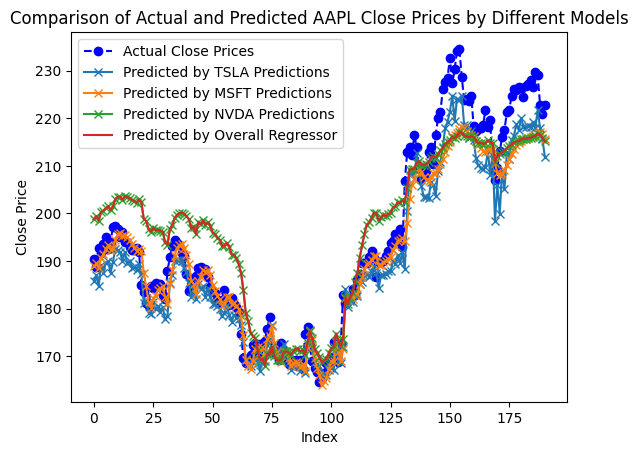

In [87]:
import matplotlib.pyplot as plt

# Inverse transform predictions for each model
predictions_inverse = [scaler_close.inverse_transform(pred.reshape(-1, 1)) for pred in predictions_array.T]

# # Plotting
# plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Close Prices', color='blue', marker='o', linestyle='--')  # Actual data

# Plot each model's predictions with a unique label
for idx, pred in enumerate(predictions_inverse):
    plt.plot(pred, label=f'Predicted by {model_names[idx]}', marker='x')

plt.title('Comparison of Actual and Predicted AAPL Close Prices by Different Models')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [24]:
regressor.predict(aapl['x_test'][-1])

ValueError: X has 6 features, but LinearRegression is expecting 3 features as input.